# Chapter 10 — Unsupervised Learning

In [1]:
library("ISLR")
library("psych")
library("randomForest")

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:psych’:

    outlier



## Lab 1: Principal Component Analysis

In [2]:
states <- row.names(USArrests)
states

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

In [3]:
names(USArrests)

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

In [4]:
apply(USArrests, 2, mean)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [5]:
apply(USArrests, 2, var)

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

In [6]:
pr.out <- prcomp(USArrests, scale = TRUE)
names(pr.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [7]:
pr.out$center
pr.out$scale

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

In [8]:
pr.out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


In [9]:
dim(pr.out$x)

[1] 50  4

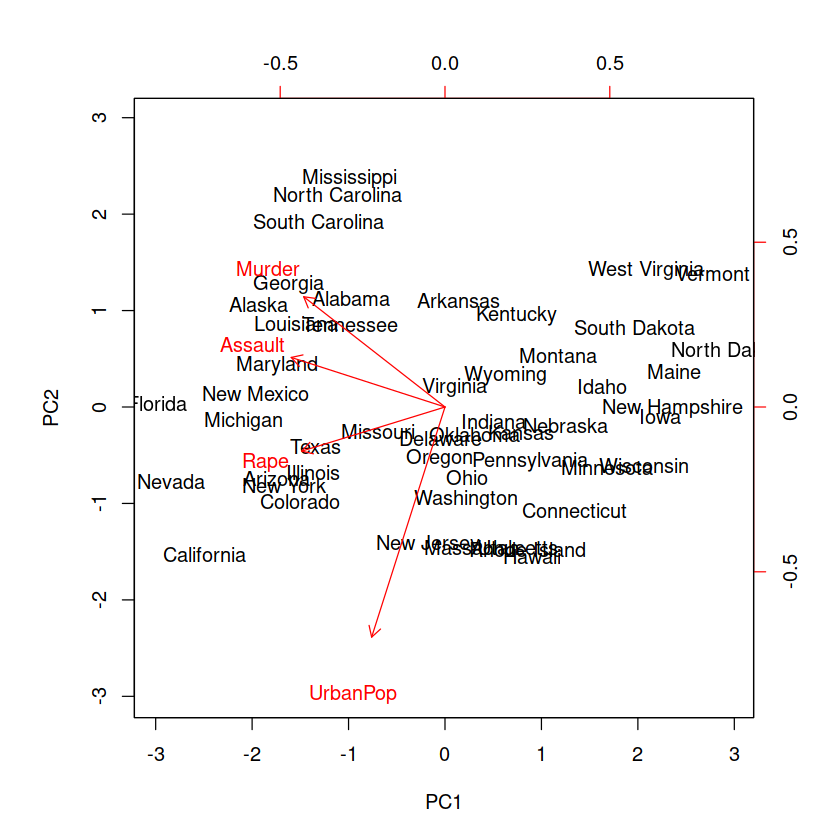

In [10]:
biplot(pr.out, scale = 0)

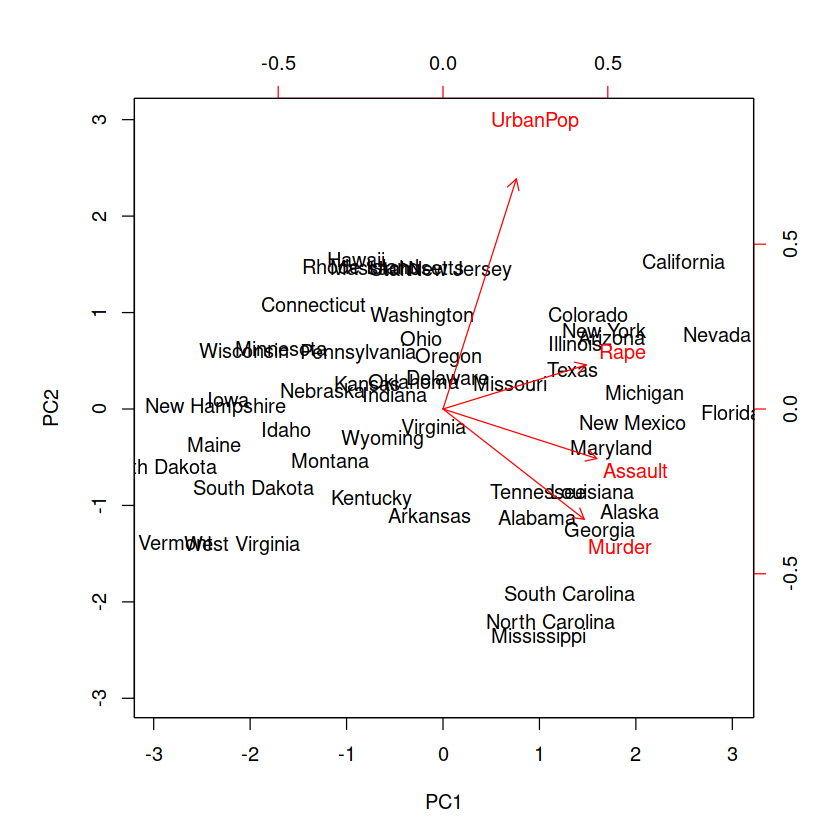

In [11]:
pr.out$rotation <- -pr.out$rotation
pr.out$x <- -pr.out$x
biplot(pr.out, scale = 0)

In [12]:
pr.out$sdev

[1] 1.5748783 0.9948694 0.5971291 0.4164494

In [13]:
pr.var <- pr.out$sdev^2

In [14]:
pve <- pr.var / sum(pr.var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

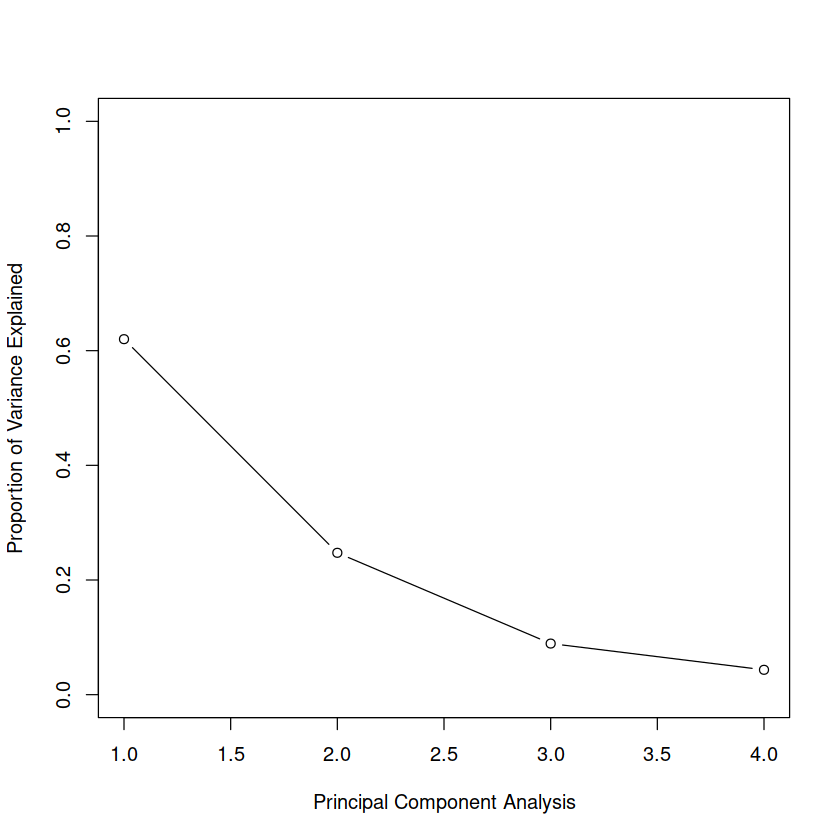

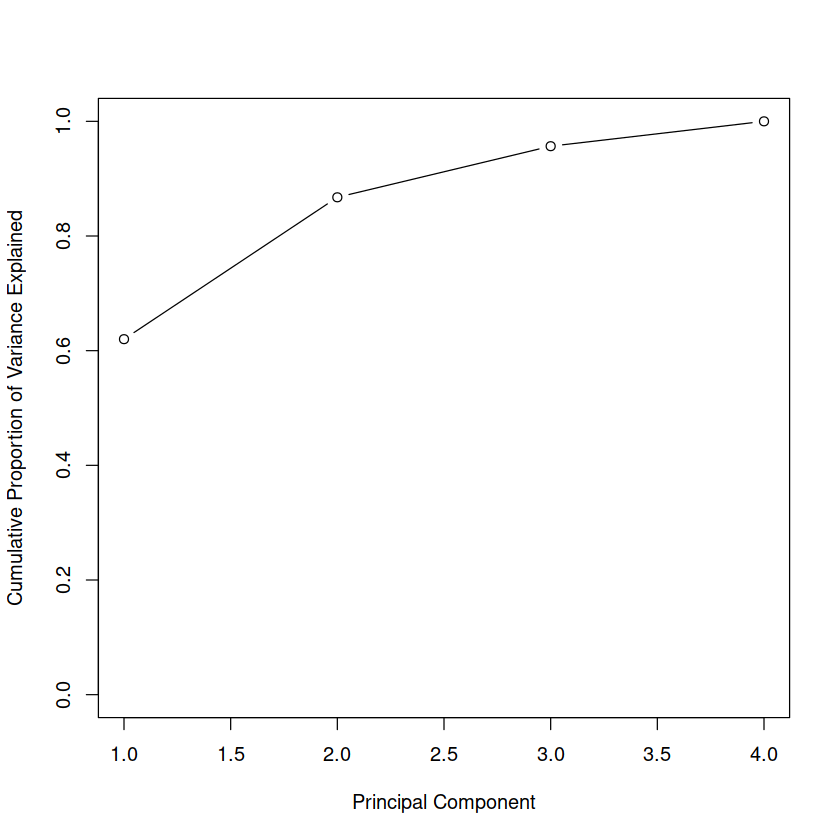

In [15]:
plot(pve,
     xlab = "Principal Component Analysis",
     ylab = "Proportion of Variance Explained",
     ylim = c(0, 1),
     type = "b")
plot(cumsum(pve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1),
     type = "b")

In [16]:
a <- c(1, 2, 8, -3)
cumsum(a)

[1]  1  3 11  8

## Lab 2: Clustering

### K-Means Clustering

In [17]:
set.seed(2)
x <- matrix(rnorm(50 * 2), ncol = 2)
x[1:25, 1] <- x[1:25, 1] + 3
x[1:25, 2] <- x[1:25, 2] - 4

km.out <- kmeans(x, 2, nstart = 20)
km.out$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

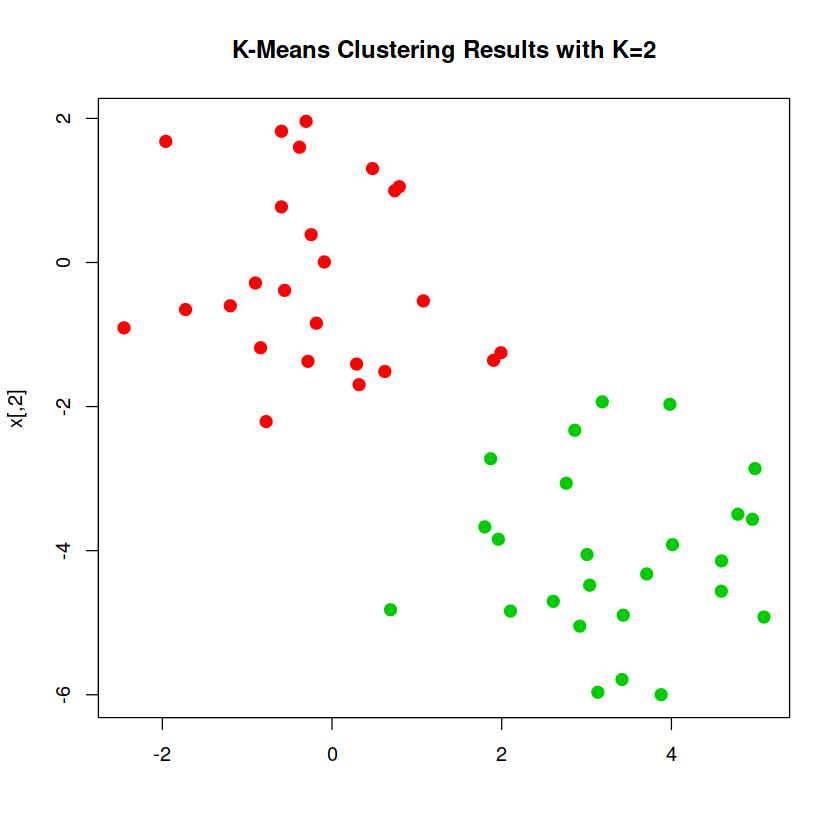

In [18]:
plot(x, col = (km.out$cluster + 1),
     main = "K-Means Clustering Results with K=2",
     xlab = "", pch = 20, cex = 2)

In [19]:
set.seed(4)
km.out <- kmeans(x, 3, nstart = 20)
km.out

K-means clustering with 3 clusters of sizes 10, 23, 17

Cluster means:
        [,1]        [,2]
1  2.3001545 -2.69622023
2 -0.3820397 -0.08740753
3  3.7789567 -4.56200798

Clustering vector:
 [1] 3 1 3 1 3 3 3 1 3 1 3 1 3 1 3 1 3 3 3 3 3 1 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

Within cluster sum of squares by cluster:
[1] 19.56137 52.67700 25.74089
 (between_SS / total_SS =  79.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

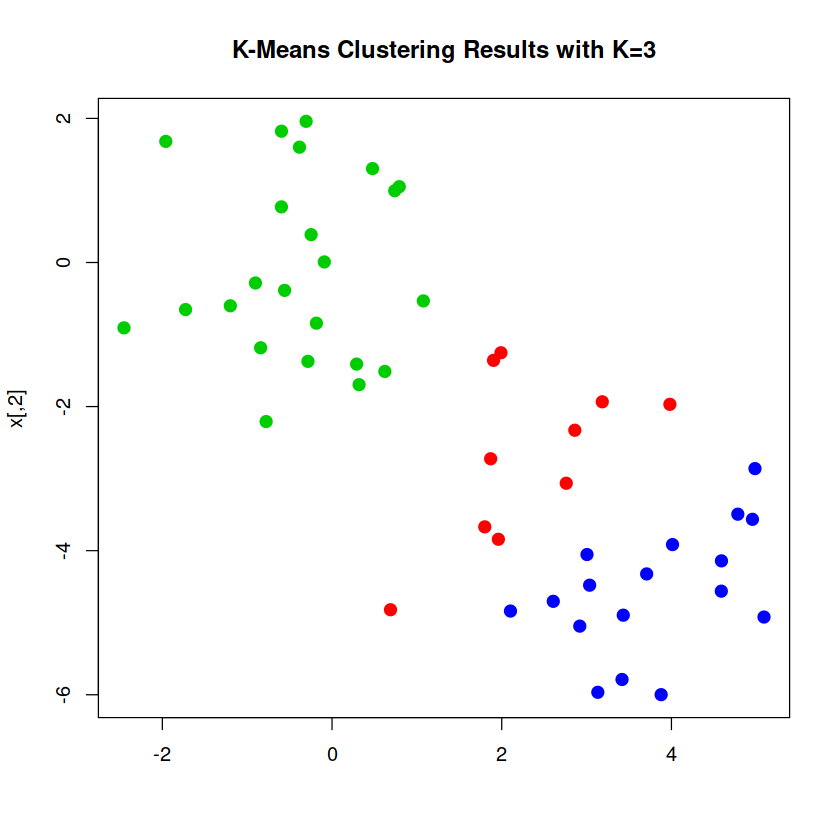

In [20]:
plot(x, col = (km.out$cluster + 1),
     main = "K-Means Clustering Results with K=3",
     xlab = "", pch = 20, cex = 2)

In [21]:
set.seed(3)
km.out <- kmeans(x, 3, nstart = 1)
km.out$tot.withinss

km.out <- kmeans(x, 3, nstart = 20)
km.out$tot.withinss

[1] 104.3319

[1] 97.97927

### Hierachical Clustering

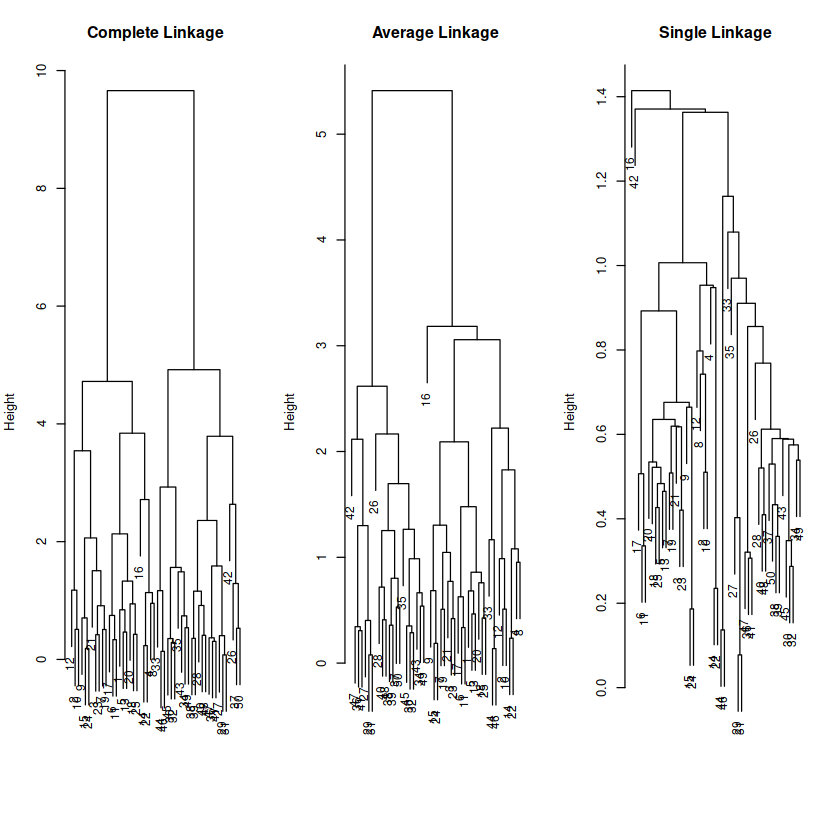

In [22]:
hc.complete <- hclust(dist(x), method = "complete")
hc.average <- hclust(dist(x), method = "average")
hc.single <- hclust(dist(x), method = "single")

par(mfrow = c(1, 3))
plot(hc.complete, main = "Complete Linkage",
     xlab = "", sub = "", cex = 0.9)
plot(hc.average, main = "Average Linkage",
     xlab = "", sub = "", cex = 0.9)
plot(hc.single, main = "Single Linkage",
     xlab = "", sub = "", cex = 0.9)

In [23]:
print(cutree(hc.complete, 2))

 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2


In [24]:
print(cutree(hc.average, 2))

 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2


In [25]:
print(cutree(hc.single, 2))

 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1


In [26]:
print(cutree(hc.single, 4))

 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3


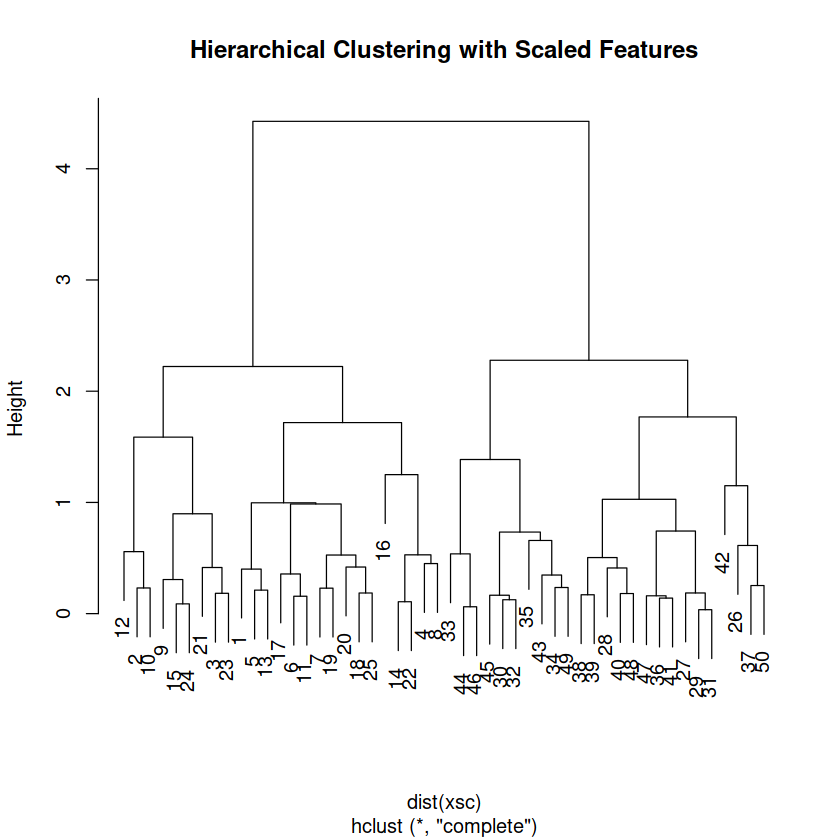

In [27]:
xsc <- scale(x)
plot(hclust(dist(xsc), method = "complete"),
     main = "Hierarchical Clustering with Scaled Features")

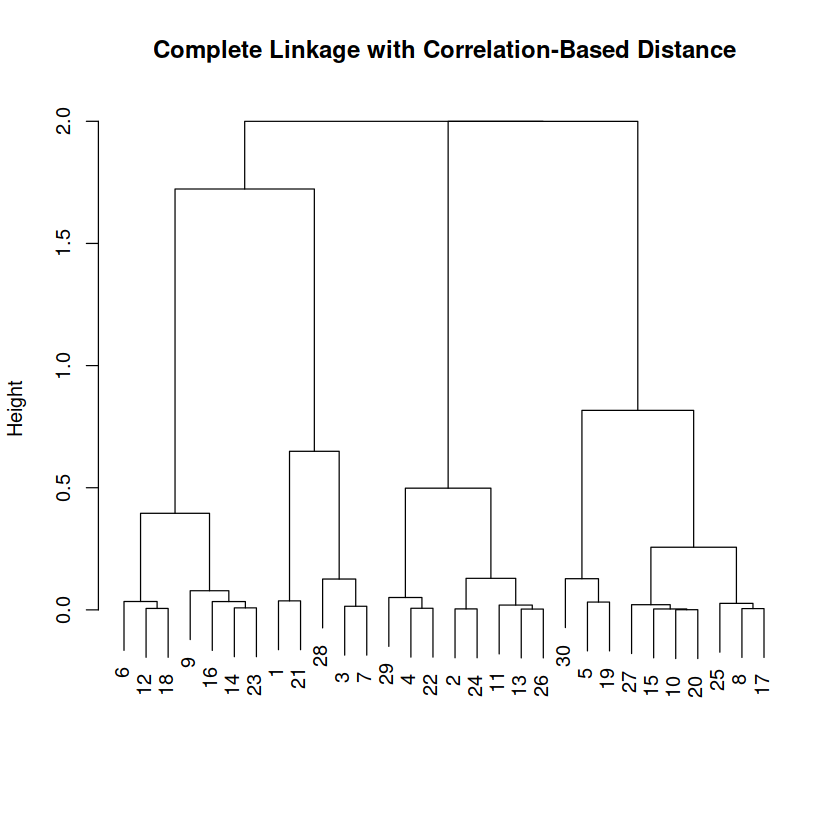

In [28]:
x <- matrix(rnorm(30 * 3), ncol = 3)
dd <- as.dist(1 - cor(t(x)))
plot(hclust(dd, method = "complete"),
     main = "Complete Linkage with Correlation-Based Distance",
     xlab = "", sub = "")

### Lab 3: NCI60 Data Example

In [29]:
nci.labs <- NCI60$labs
nci.data <- NCI60$data

In [30]:
dim(nci.data)

[1]   64 6830

In [31]:
nci.labs[1:4]
table(nci.labs)

[1] "CNS"   "CNS"   "CNS"   "RENAL"

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

#### PCA on the NCI60 Data

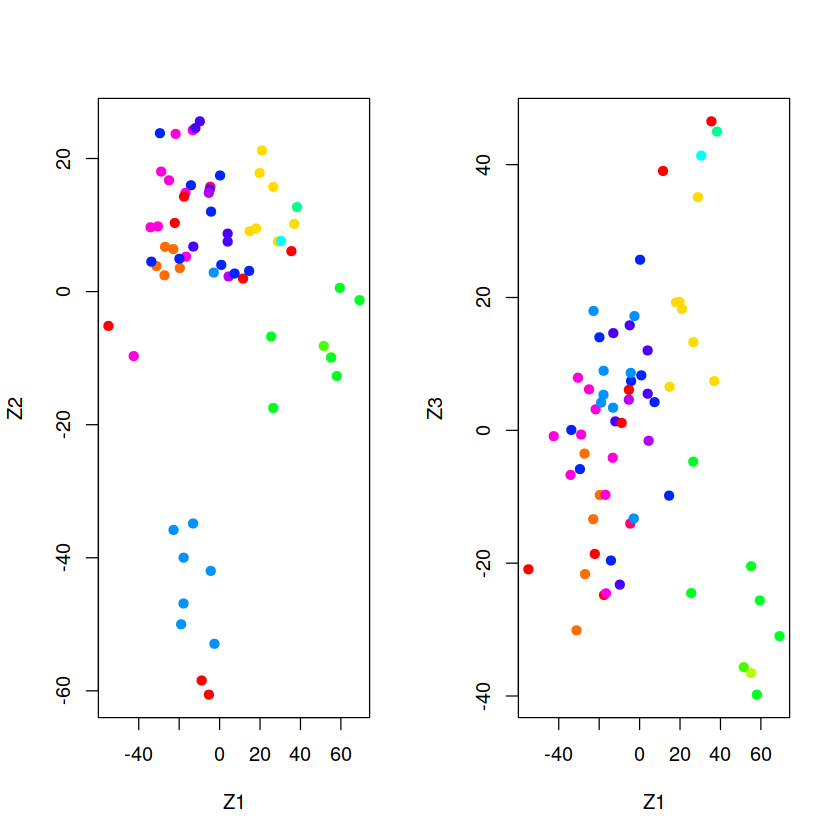

In [32]:
pr.out <- prcomp(nci.data, scale = TRUE)

cols <- function(vec) {
    cols <- rainbow(length(unique(vec)))
    cols[as.numeric(as.factor(vec))]
}

par(mfrow = c(1, 2))
plot(pr.out$x[, 1:2], col = cols(nci.labs),
     pch = 19, xlab = "Z1", ylab = "Z2")
plot(pr.out$x[, c(1, 3)], col = cols(nci.labs),
     pch = 19, xlab = "Z1", ylab = "Z3")

In [33]:
summary(pr.out)

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

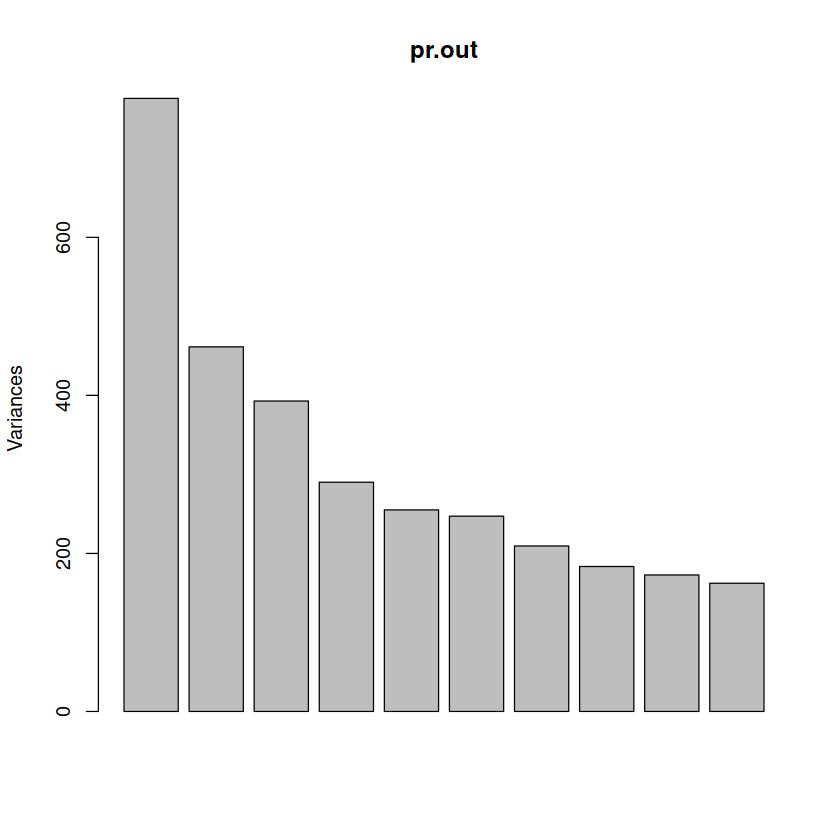

In [34]:
plot(pr.out)

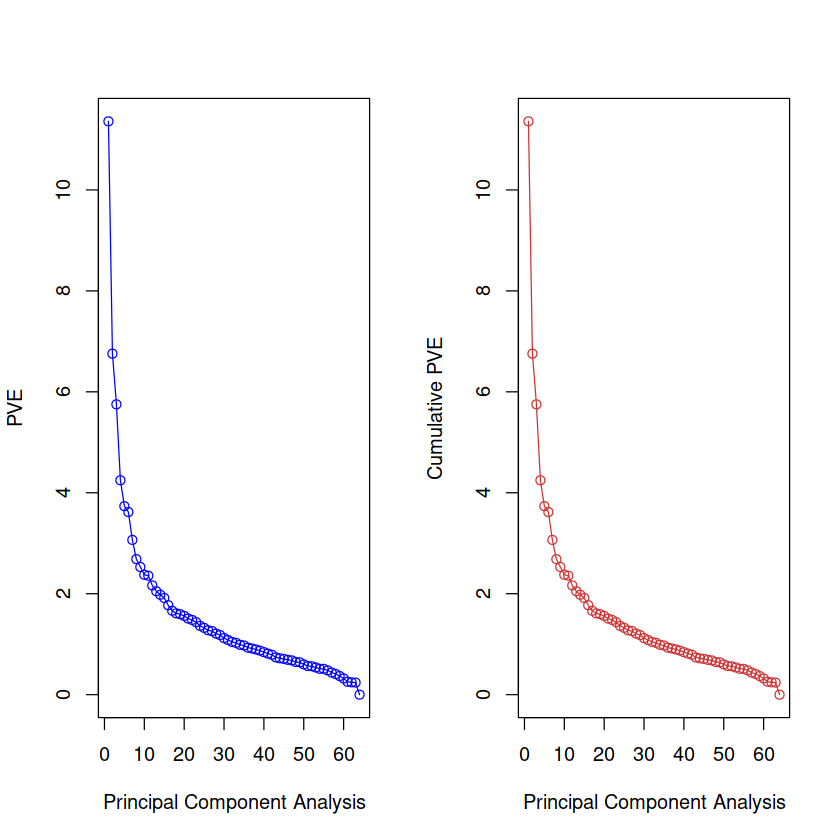

In [35]:
pve <- 100*pr.out$sdev^2 / sum(pr.out$sdev^2)
par(mfrow = c(1, 2))
plot(pve, type = "o", ylab = "PVE",
     xlab = "Principal Component Analysis",
     col = "blue")
plot(pve, type = "o", ylab = "Cumulative PVE",
     xlab = "Principal Component Analysis",
     col = "brown3")

### Clustering the Observations of the NCI60 Data

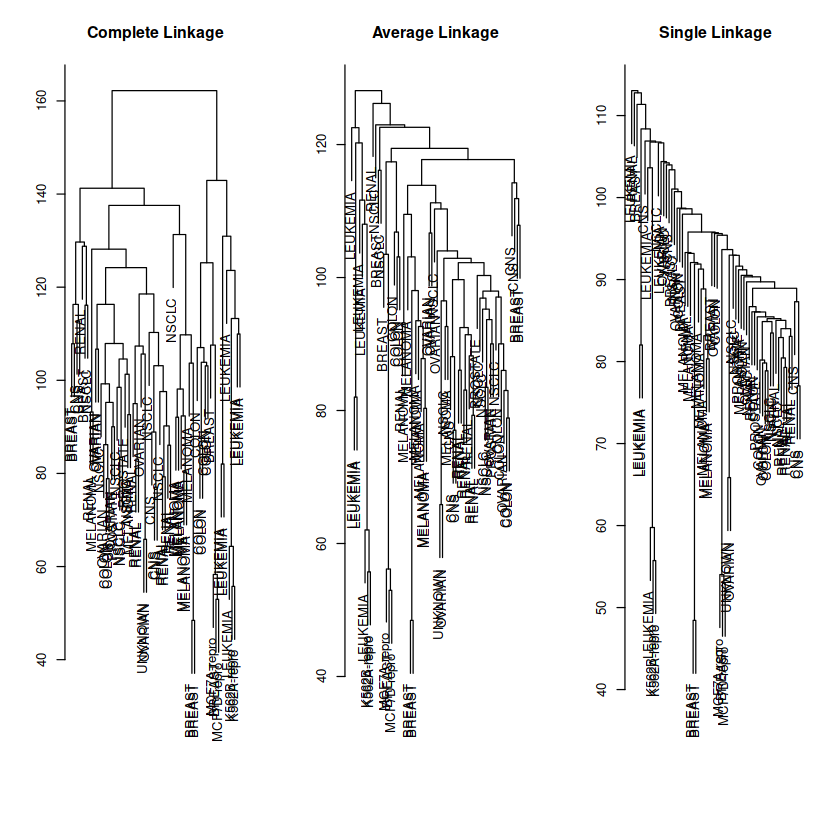

In [36]:
sd.data <- scale(nci.data)
par(mfrow = c(1, 3))
data.dist <- dist(sd.data)
plot(hclust(data.dist), labels = nci.labs,
     main = "Complete Linkage", xlab = "",
     sub = "", ylab = "")
plot(hclust(data.dist, method = "average"),
     labels = nci.labs,
     main = "Average Linkage", xlab = "",
     sub = "", ylab = "")
plot(hclust(data.dist, method = "single"),
     labels = nci.labs,
     main = "Single Linkage", xlab = "",
     sub = "", ylab = "")

In [37]:
hc.out <- hclust(dist(sd.data))
hc.clusters <- cutree(hc.out, 4)
table(hc.clusters, nci.labs)

           nci.labs
hc.clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci.labs
hc.clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0

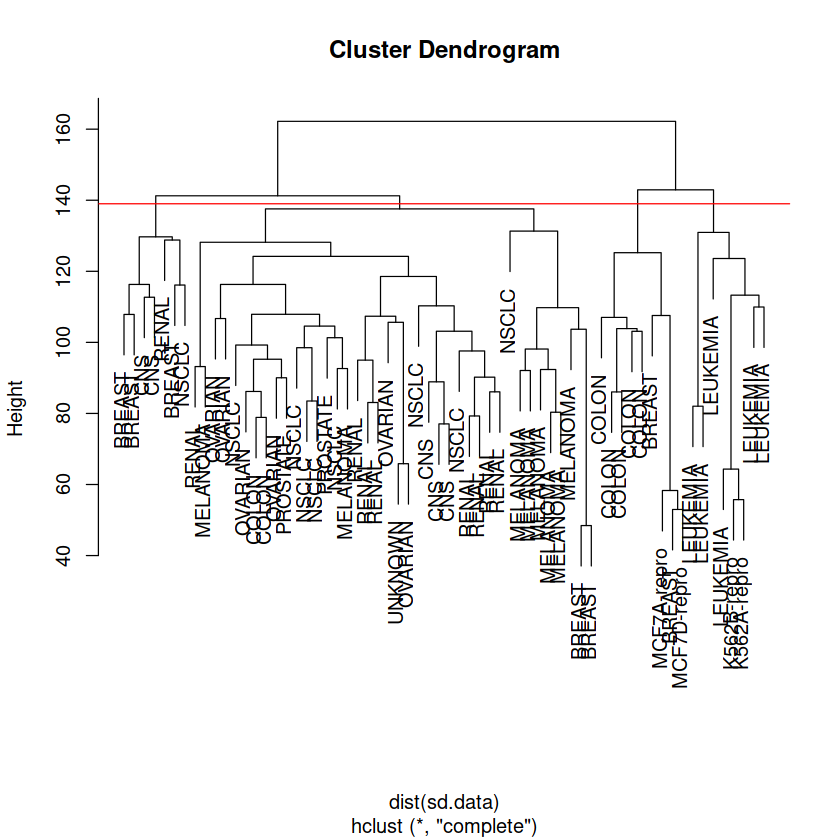

In [38]:
par(mfrow = c(1, 1))
plot(hc.out, labels = nci.labs)
abline(h = 139, col = "red")

In [39]:
hc.out


Call:
hclust(d = dist(sd.data))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 


In [40]:
set.seed(2)
km.out <- kmeans(sd.data, 4, nstart = 20)
km.clusters = km.out$cluster
table(km.clusters, hc.clusters)

           hc.clusters
km.clusters  1  2  3  4
          1 11  0  0  9
          2  0  0  8  0
          3  9  0  0  0
          4 20  7  0  0

   nci.labs
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      0   2     7           0           0        2           0           0
  2      5   3     0           0           0        0           0           0
  3      0   0     0           1           1        4           0           0
  4      2   0     0           0           0        0           1           1
   nci.labs
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        1     8       5        2     7       0
  2        7     1       1        0     2       1
  3        0     0       0        0     0       0
  4        0     0       0        0     0       0

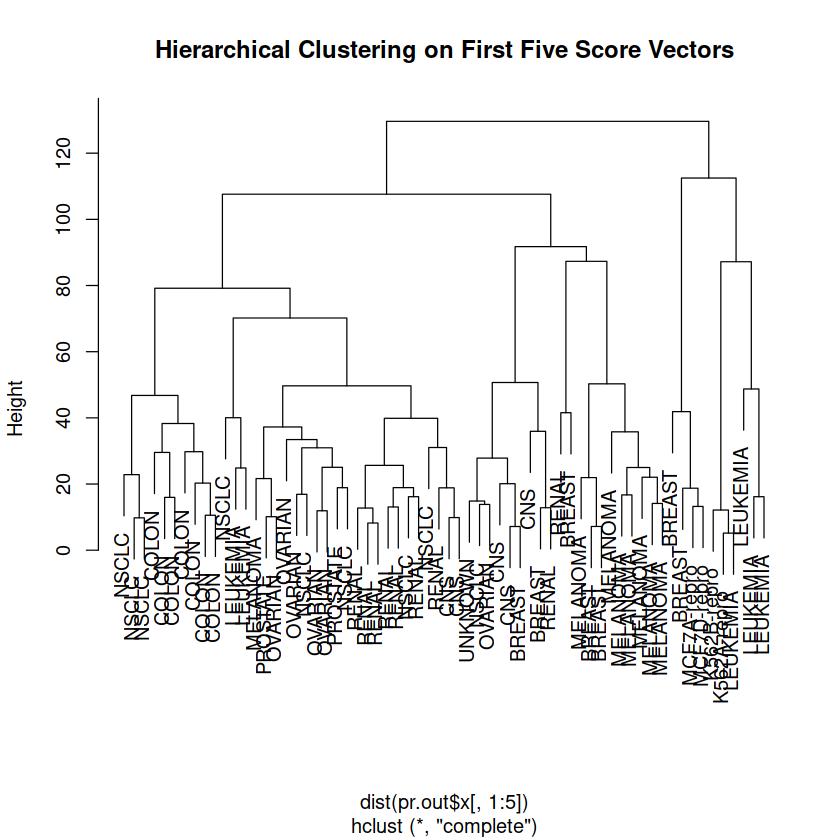

In [41]:
hc.out <- hclust(dist(pr.out$x[, 1:5]))
plot(hc.out, 
     labels = nci.labs,
     main = "Hierarchical Clustering on First Five Score Vectors")
table(cutree(hc.out, 4), nci.labs)

## Applied

### Exercise 7

**USArrests** data set.

In [42]:
scaled <- scale(USArrests)

In [43]:
corr <- cor(t(scaled))
dist <- dist(scaled)

div <- as.dist(1 - corr) / dist^2
summary(div)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000086 0.069135 0.133943 0.234193 0.262589 4.887686 

In [44]:
round(div, 1)

               Alabama Alaska Arizona Arkansas California Colorado Connecticut
Alaska             0.1                                                        
Arizona            0.3    0.1                                                 
Arkansas           0.1    0.0     0.2                                         
California         0.2    0.1     0.2      0.1                                
Colorado           0.2    0.1     0.3      0.2        0.1                     
Connecticut        0.2    0.1     0.1      0.3        0.0      0.1            
Delaware           0.3    0.1     0.1      0.4        0.1      0.2         0.1
Florida            0.0    0.1     0.3      0.0        0.4      0.3         0.1
Georgia            0.1    0.1     0.2      0.1        0.2      0.2         0.1
Hawaii             0.2    0.1     0.1      0.2        0.0      0.1         0.1
Idaho              0.2    0.0     0.0      0.4        0.0      0.0         0.3
Illinois           0.4    0.2     0.6      0.3      

I don’t understand how this is proportional.

### Exercise 9

In [45]:
clust <- hclust(dist(USArrests))
cutree(clust, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

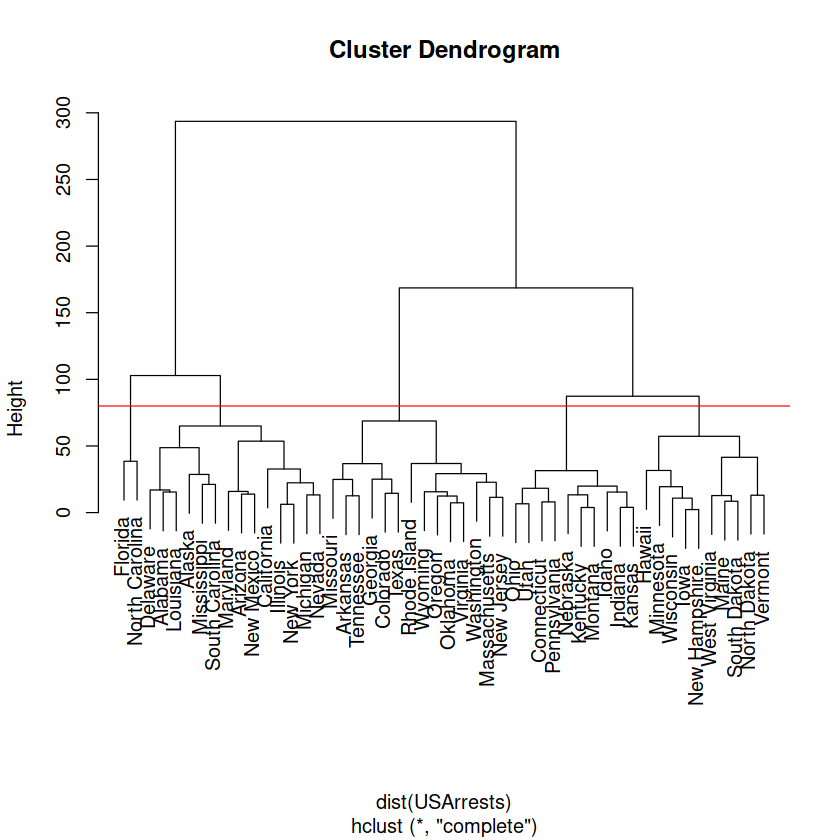

In [46]:
plot(clust)
abline(h = 80, col = "red")

In [47]:
scaled <- scale(USArrests)
clust2 <- hclust(dist(scaled))

In [48]:
clust$merge

-15,-29
-17,-26
-14,-16
-13,-32
-35,-44
-36,-46
-7,-38
-19,-41
-49,1
-21,-30
-37,6


In [49]:
table(raw = cutree(clust, 3),
      scaled = cutree(clust2, 3))

   scaled
raw  1  2  3
  1  6  9  1
  2  2  2 10
  3  0  0 20

The variables should be scaled before to avoid one variable dominating the other on the euclidean distance.

### Exercise 10

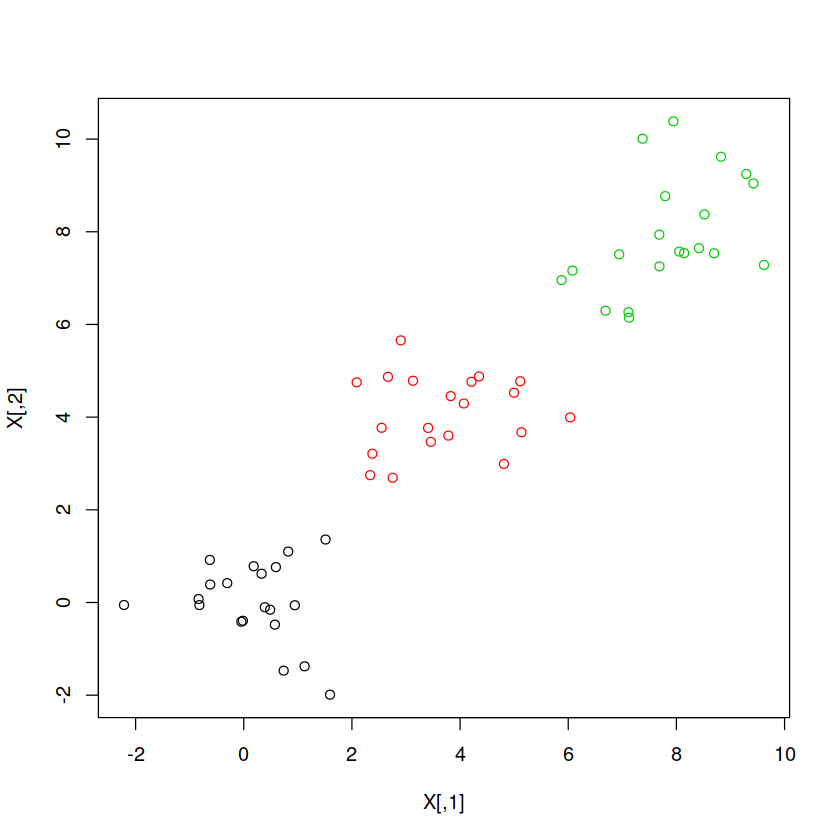

In [50]:
set.seed(1)
X <- rbind(
    matrix(rnorm(20 * 50, mean = 0), nrow = 20),
    matrix(rnorm(20 * 50, mean = 4), nrow = 20),
    matrix(rnorm(20 * 50, mean = 8), nrow = 20))
y <- c(rep(1, 20), rep(2, 20), rep(3, 20))
plot(X, col = y)

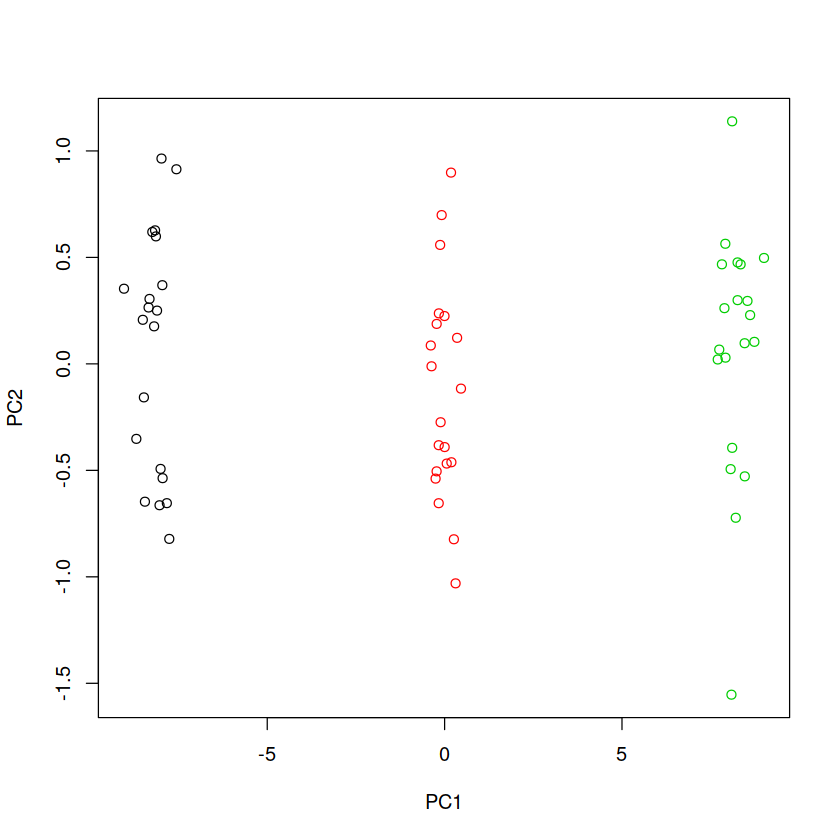

In [51]:
pr.out <- prcomp(X, scale = TRUE)
plot(pr.out$x, col = y)

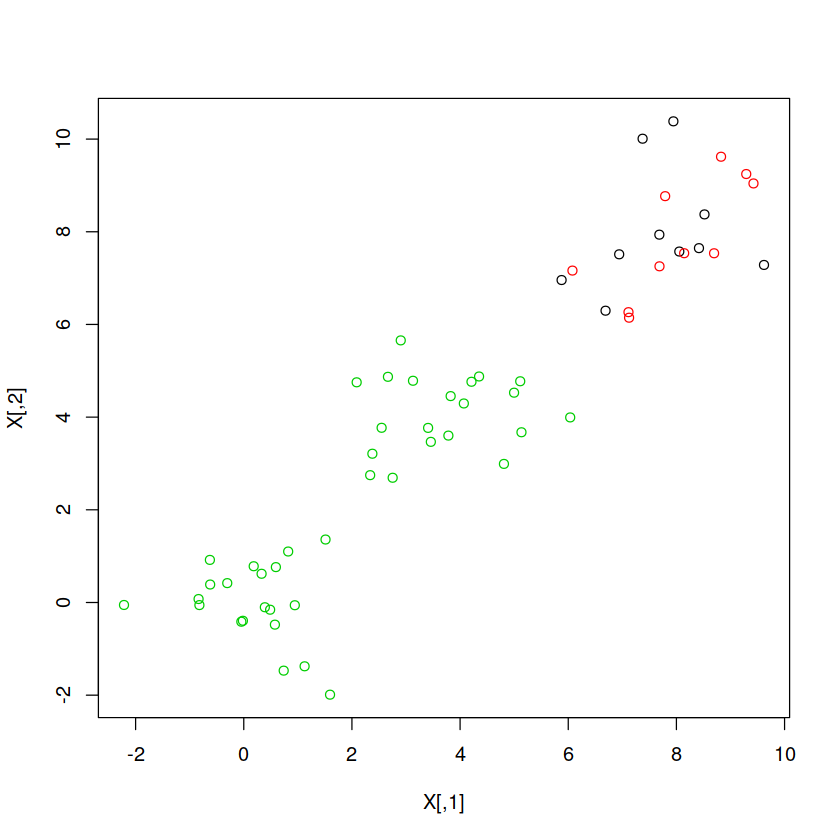

In [52]:
clust <- kmeans(X, centers = 3)
plot(X, col = clust$cluster)

In [53]:
table(kmeans = clust$cluster, y)

      y
kmeans  1  2  3
     1  0  0 10
     2  0  0 10
     3 20 20  0

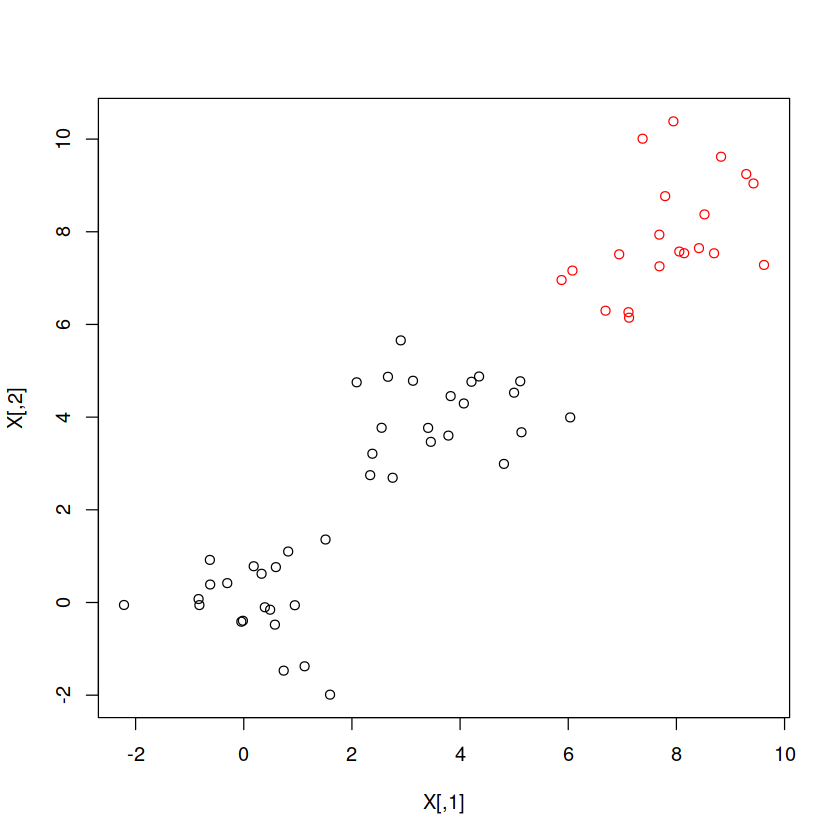

In [54]:
clust <- kmeans(X, centers = 2)
plot(X, col = clust$cluster)

In [55]:
table(kmeans = clust$cluster, y)

      y
kmeans  1  2  3
     1 20 20  0
     2  0  0 20

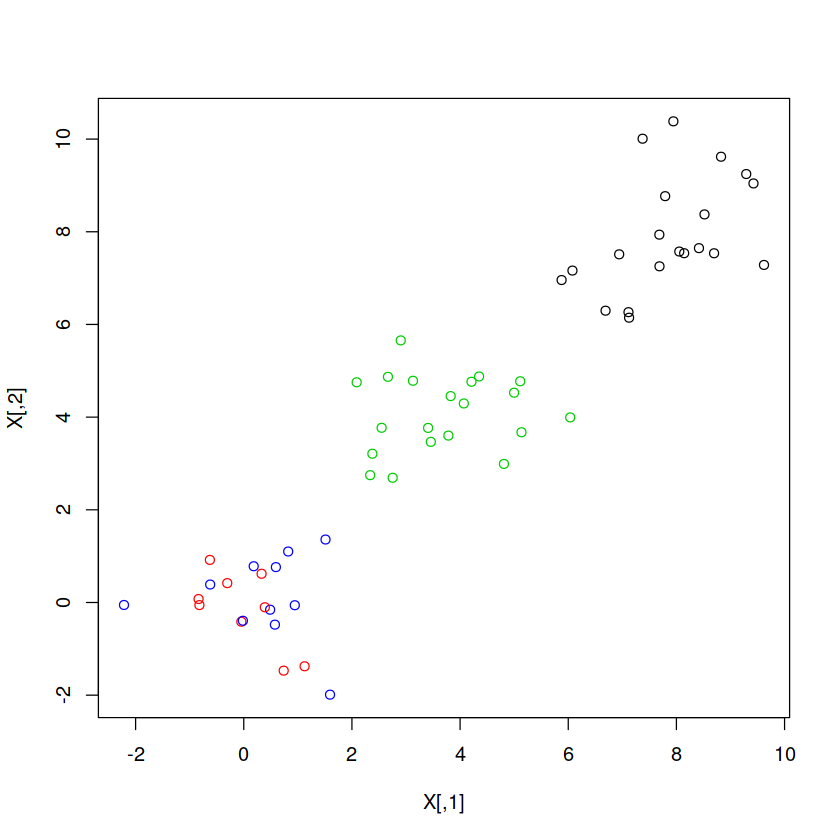

In [56]:
clust <- kmeans(X, centers = 4)
plot(X, col = clust$cluster)

In [57]:
table(kmeans = clust$cluster, y)

      y
kmeans  1  2  3
     1  0  0 20
     2  9  0  0
     3  0 20  0
     4 11  0  0

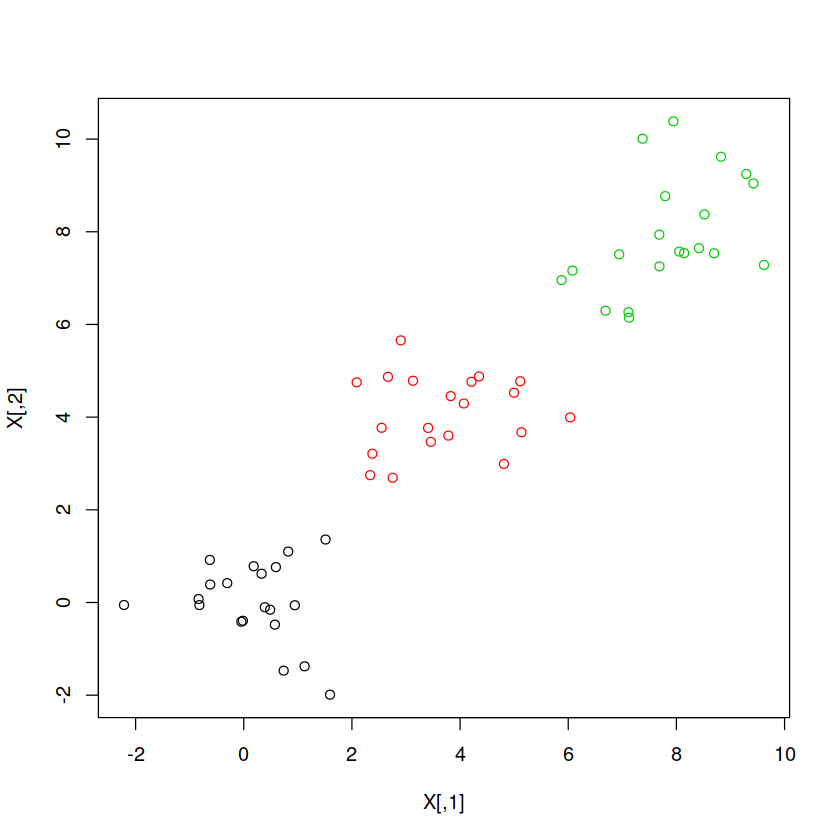

In [58]:
set.seed(1)
pr.out <- prcomp(X, scale = TRUE)
clust <- kmeans(pr.out$x[, 1:2], centers = 3)
plot(X, col = clust$cluster)

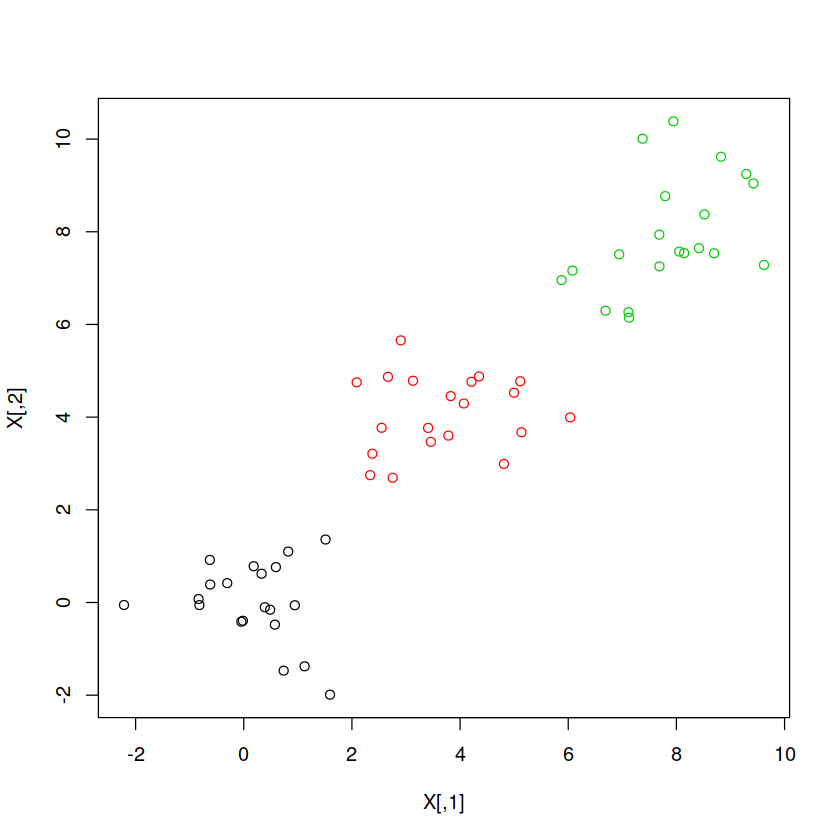

In [59]:
set.seed(1)
pr.out <- prcomp(X, scale = TRUE)
clust <- kmeans(pr.out$x[, 1], centers = 3)
plot(X, col = clust$cluster)

Much better. In fact, this problem is so easy that with the first principal component, which already explains 91.3% of the variance, is sufficient to capture the clusters.

In [60]:
summary(pr.out)

Importance of components:
                          PC1     PC2    PC3    PC4     PC5     PC6    PC7
Standard deviation     6.7578 0.55041 0.5245 0.5195 0.49726 0.48114 0.4636
Proportion of Variance 0.9133 0.00606 0.0055 0.0054 0.00495 0.00463 0.0043
Cumulative Proportion  0.9133 0.91940 0.9249 0.9303 0.93525 0.93988 0.9442
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.44017 0.42078 0.41651 0.40932 0.40115 0.37839 0.36833
Proportion of Variance 0.00387 0.00354 0.00347 0.00335 0.00322 0.00286 0.00271
Cumulative Proportion  0.94805 0.95159 0.95506 0.95841 0.96163 0.96450 0.96721
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.34829 0.33858 0.32447 0.32278 0.31026 0.30160 0.2918
Proportion of Variance 0.00243 0.00229 0.00211 0.00208 0.00193 0.00182 0.0017
Cumulative Proportion  0.96964 0.97193 0.97403 0.97612 0.97804 0.97986 0.9816
                          PC22    PC23    PC24

### Exercise 11

In [61]:
df <- read.csv("data/Ch10Ex11.csv", header = FALSE)

In [62]:
dim(df)

[1] 1000   40

In [63]:
dd <- as.dist(1 - cor(scale(df)))
clust <- hclust(dd)
table(cutree(clust, 2))


 1  2 
10 30 

Yes.

In [64]:
dd <- as.dist(1 - cor(scale(df)))
clust <- hclust(dd, method = "single")
table(cutree(clust, 2))


 1  2 
39  1 

In [65]:
dd <- as.dist(1 - cor(scale(df)))
clust <- hclust(dd, method = "average")
table(cutree(clust, 2))


 1  2 
 9 31 

The results depend on the hierarchical clustering method but not on pre-scaling the genes samples.

c) Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.

I thought on transforming this on a classification problem and use a method to find the most important features to discriminate the two groups.

Thus, I will create a target column and run a classification algorithm.

The first thing to note is that we want to find the most discriminating genes to answer the two groups of samples.

In [72]:
dt <- data.frame(t(df))
dt$y <- as.factor(c(rep(0, 20), rep(1, 20)))

In [73]:
dim(dt)

[1]   40 1001

In [74]:
rf <- randomForest(y ~ ., data = dt, importance = TRUE)

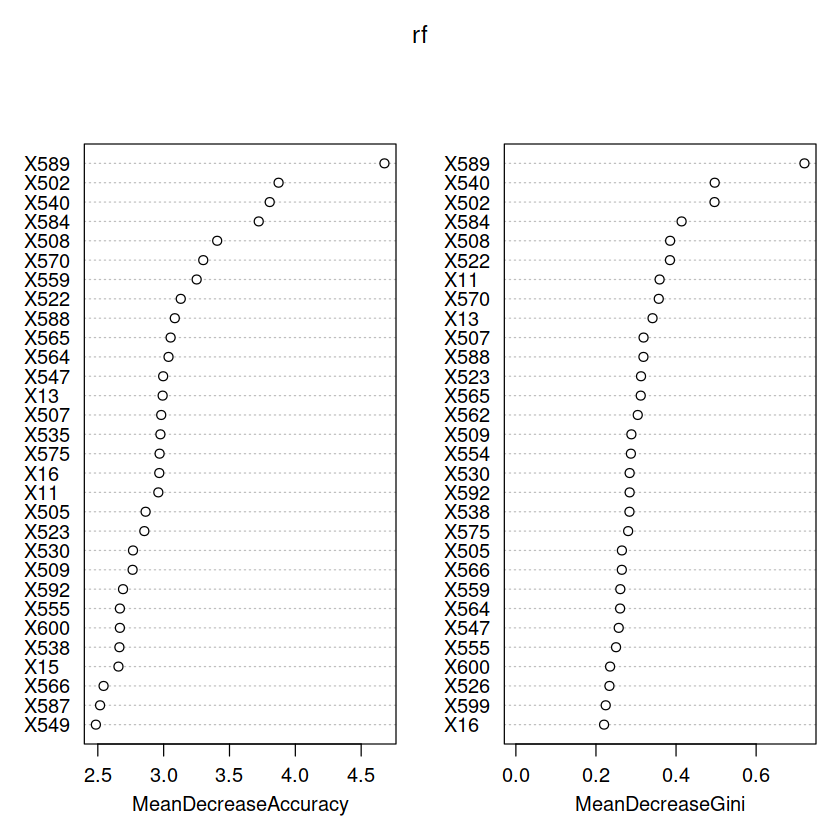

In [75]:
varImpPlot(rf)

The above plot shows the most important genes to discrimate between heaalthy patients and diseased patients.